In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

In [75]:
file= pd.ExcelFile('Data_Fig1.xlsx')

df= pd.read_excel(file, sheet_name='fig_1c')
print(df.columns)
print('Number of rows:', df.shape[0],'Number of columns:', df.shape[1])
df.head()

Index(['nhp_id', 'regression_slope_distribution', 'Unnamed: 2', 'Unnamed: 3',
       'nhp_id.1', 'regression_slope_distribution.1'],
      dtype='object')
Number of rows: 181 Number of columns: 6


,nhp_id,regression_slope_distribution,Unnamed: 2,Unnamed: 3,nhp_id.1,regression_slope_distribution.1
0,a,0.710459,NaN,NaN,m,0.583451
1,a,0.778920,NaN,NaN,m,0.791238
2,a,0.831378,NaN,NaN,m,0.872507
3,a,0.894589,NaN,NaN,m,0.778305
4,a,0.802312,NaN,NaN,m,0.704754


In [76]:
a = df['regression_slope_distribution'].dropna().values
m = df['regression_slope_distribution.1'].dropna().values

The Matlab code used a histogram with 'Normalization' set to 'Probability', meaning that the height of each bar is given by the number of data points in that bin divided by the total number of data points. This directly represents the empirical probability, and the sum of all the heights is 1. This is a probability mass, not a probability density. 

In Python, the line 'plt.hist(density=True)' computes a probability density instead, normalising the histogram so that the integral over the bins equals 1. To make Python's histogram behave in the same way, I must add explicit weights. I create a weight vector such that each sample contributes 1/N. Calling plt.hist(..., weights=weights) will consequently sum the weight in each bin, matching the Matlab function. 

In [84]:
def plot_1c(s_monkey,title,save,filename):

    N = len(s_monkey)
    bins= np.arange(0,1.1,0.05)
    weights= np.ones(N)/N

    plt.figure(figsize=(3.5,3.5))
    plt.hist(s_monkey,bins= bins, weights= weights, color='#d62728', edgecolor='white')
    plt.xlim(-0.1,1.1)
    plt.ylim(0,0.3)

    plt.xlabel("Regression slope",fontsize=10)
    plt.ylabel("Probability",fontsize= 10)
    plt.title(f"{title}\n$n = {N}$", fontsize=12)

    plt.yticks(np.arange(0, 0.31, 0.1))

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()

    if save:
        os.makedirs('Fig1_figures', exist_ok=True)
        plt.savefig(f'Fig1_figures/{filename}.png', dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()

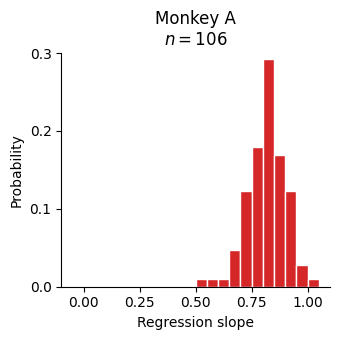

In [85]:
plot_1c(a,'Monkey A',save= True, filename='Fig1c_MonkeyA' )


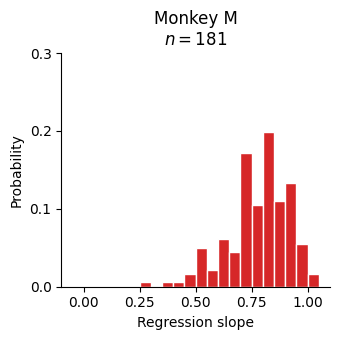

In [86]:
plot_1c(m,'Monkey M', save= True, filename='Fig1c_MonkeyM'  )